In [1]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import csv 
import statsmodels.api as sm
import numpy as np

In [2]:
df = pd.read_csv('combined.csv')
print(df.shape)

(8486068, 18)


In [3]:
codes = {
  250: 'France',
  364: 'Iran',
  380: 'Italy',
  710: 'South Africa',
  704: 'Vietnam'
}

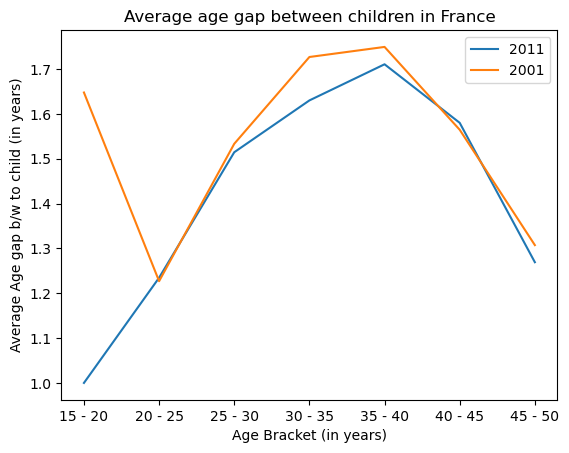

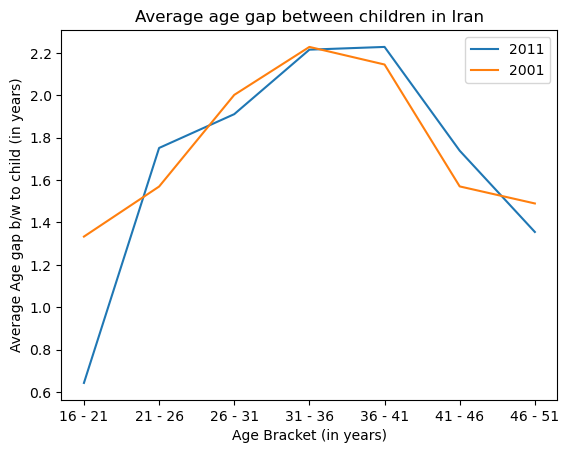

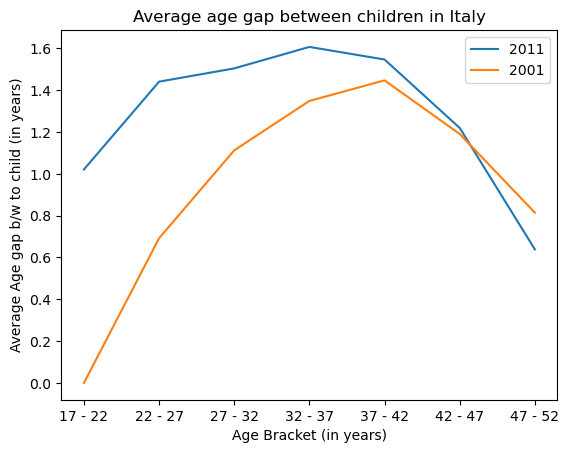

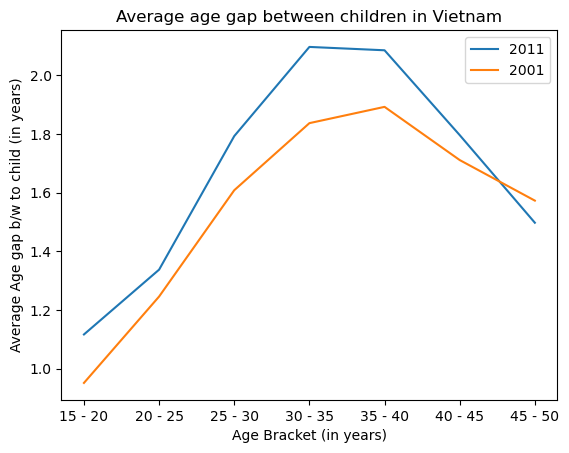

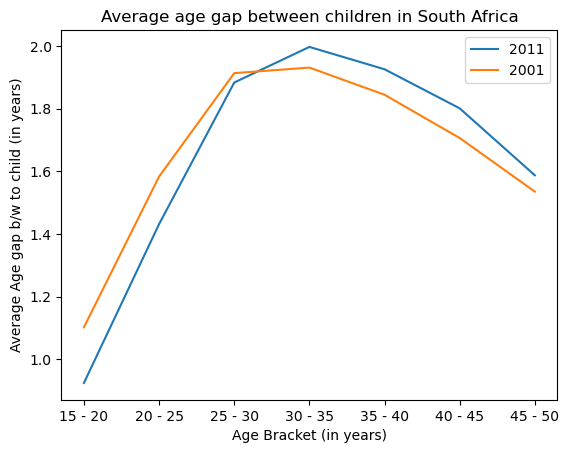

In [5]:
# Age gap study

df = df[df['NCHILD'] >= 2]
df = df[df['ELDCH'] <= 10]
df['AGEGAP'] = (df['ELDCH'] - df['YNGCH']) / df['NCHILD']

country_groups = df.groupby('COUNTRY')

# Access each group
for country, country_group in country_groups: 
  x = {2011: [], 2001: []}
  y = {2011: [], 2001: []}
  
  plt.figure()
  plt.title(f"Average age gap between children in {codes[country]}")
  for i in range(country_group['AGE'].min(), country_group['AGE'].max(), 5):
    year_groups = country_group.groupby('YEAR')
    
    for year, year_group in year_groups:
      agespec_df = year_group[(year_group['AGE'] >= i) & (year_group['AGE'] < i + 5)]
      avg_gap = agespec_df['AGEGAP'].sum() / agespec_df['AGEGAP'].count()
      x[year] = x[year] + [f"{i} - {i+5}"]
      y[year] = y[year] + [avg_gap]
  
  plt.plot(x[2011], y[2011])
  plt.plot(x[2001], y[2001])
  plt.legend(['2011', '2001'])
  plt.xlabel('Age Bracket (in years)')
  plt.ylabel('Average Age gap b/w to child (in years)')

In [5]:
# Successive child study

fields = ['Country', 'Already had childrens', 'Percent Children Born (1995 - 2005)', 'Percent Children Born (2005 - 2010)']  

with open('successive_child_study.csv', 'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerow(fields)
  
  country_groups = df.groupby('COUNTRY')
  for country, country_group in country_groups:
    for i in range(1, int(country_group['NCHILD'].max()+1)):
      year_groups = country_group.groupby('YEAR')
      
      row = [codes[country], i - 1]
      for year, year_group in year_groups:
        if(year_group[(year_group['NCHILD'] == i) | (year_group['NCHILD'] == i-1)].shape[0] == 0):
          continue;
        row = row + ["{:.2f}".format(year_group[(year_group['NCHILD'] == i) & (year_group['YNGCH'] <= 5)].shape[0] * 20 / year_group[(year_group['NCHILD'] == i) | (year_group['NCHILD'] == i-1)].shape[0])]
      
      csvwriter.writerow(row)

In [10]:
df[(df['ELDCH'] <= 10) & (df['NCHILD'] > 0)].head(100)

,COUNTRY,NCHILD,ELDCH,YNGCH,AGE,MARST,EDATTAIN,EMPSTAT,OCCISCO,YEAR,PAID_LEAVE,PATERNITY,MATERNITY,FERTILITY_RATE_1,FERTILITY_RATE_2,FERTILITY_RATE_3,FERTILITY_RATE_4,FERTILITY_RATE_5
1803,250,1.0,8.0,8.0,36,2.0,4,1,3.0,2011,1,1,3,0.053728,0.048042,0.041381,0.035192,0.030487
1809,250,1.0,7.0,7.0,42,1.0,4,1,3.0,2011,1,1,3,0.053728,0.048042,0.041381,0.035192,0.030487
1816,250,1.0,4.0,4.0,25,1.0,4,1,2.0,2011,1,1,3,0.053728,0.048042,0.041381,0.035192,0.030487
1819,250,2.0,10.0,7.0,43,1.0,2,1,9.0,2011,1,1,3,0.053728,0.048042,0.041381,0.035192,0.030487
1820,250,1.0,2.0,2.0,33,1.0,4,1,3.0,2011,1,1,3,0.053728,0.048042,0.041381,0.035192,0.030487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,250,1.0,7.0,7.0,38,1.0,4,1,4.0,2011,1,1,3,0.053728,0.048042,0.041381,0.035192,0.030487
2376,250,1.0,10.0,10.0,48,3.0,3,1,5.0,2011,1,1,3,0.053728,0.048042,0.041381,0.035192,0.030487
2377,250,1.0,0.0,0.0,26,1.0,3,1,4.0,2011,1,1,3,0.053728,0.048042,0.041381,0.035192,0.030487
2379,250,1.0,3.0,3.0,29,1.0,2,1,5.0,2011,1,1,3,0.053728,0.048042,0.041381,0.035192,0.030487


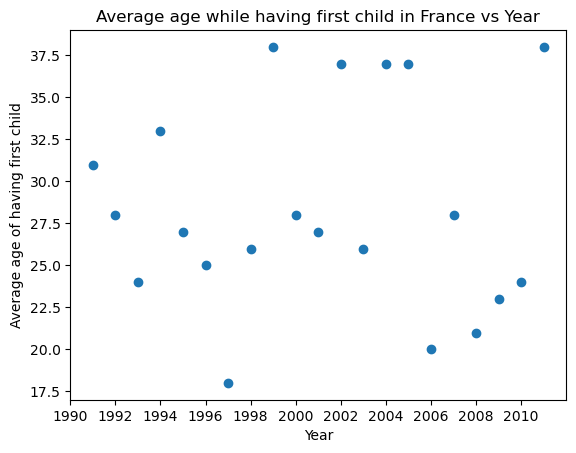

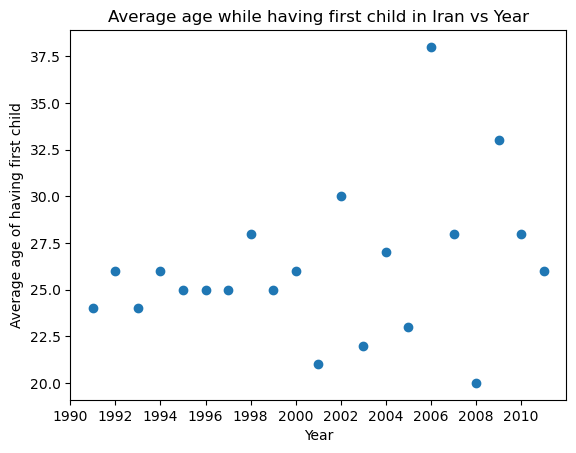

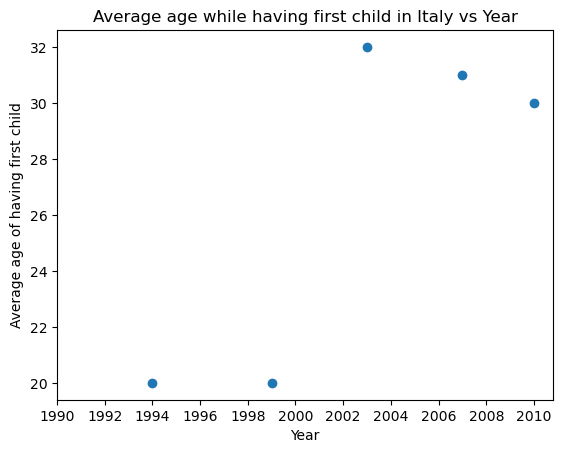

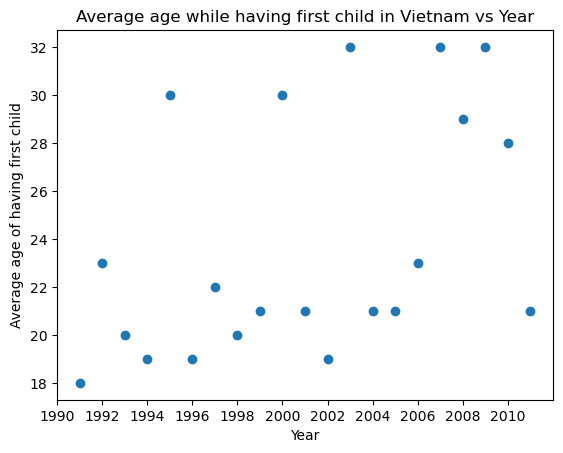

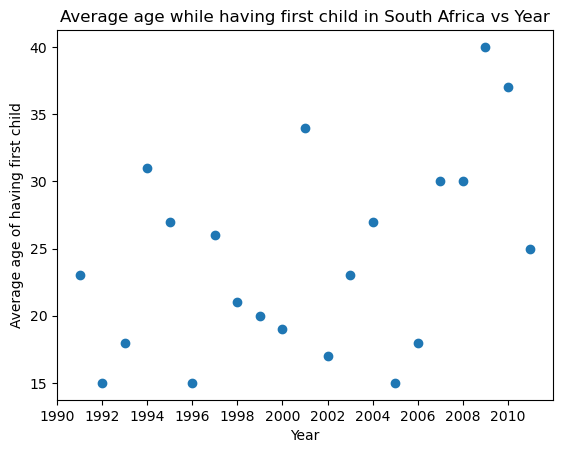

In [11]:
# Minimum age study

df = df[(df['ELDCH'] <= 10) & (df['NCHILD'] > 0)]

country_groups = df.groupby('COUNTRY')

# Access each group
for country, country_group in country_groups: 
  plt.figure()
  plt.title(f"Average age while having first child in {codes[country]} vs Year")
  count = {}
  sum = {}
  
  year_groups = country_group.groupby('YEAR')
  
  for year, year_group in year_groups:
    for index, row in year_group.iterrows():
      if((year - row['ELDCH']) in row):
        count[year - row['ELDCH']] += 1
        sum[year - row['ELDCH']] += (row['AGE'] - row['ELDCH'])
      else:
        count[year - row['ELDCH']] = 1
        sum[year - row['ELDCH']] = (row['AGE'] - row['ELDCH'])      
    
  x = sorted(count.keys())
  y = []
  for i in x:
    y = y + [sum[i] / count[i]]
  
  plt.scatter(x, y)
  plt.xlabel('Year')
  plt.ylabel('Average age of having first child')
  plt.xticks([i for i in range(1990, 2011, 2)])

In [4]:
# regression analysis

leave_data = {
  250: {
    2011: {
      "PAID_LEAVE": 1,
      "PATERNITY": 1,
      "MATERNITY": 3
    },
    2001: {
      "PAID_LEAVE": 1,
      "PATERNITY": 0,
      "MATERNITY": 3
    }
  },
  364: {
    2011: {
      "PAID_LEAVE": 1,
      "PATERNITY": 0,
      "MATERNITY": 5
    },
    2001: {
      "PAID_LEAVE": 1,
      "PATERNITY": 0,
      "MATERNITY": 2
    }
  },
  380: {
    2011: {
      "PAID_LEAVE": 1,
      "PATERNITY": 1,
      "MATERNITY": 4
    },
    2001: {
      "PAID_LEAVE": 1,
      "PATERNITY": 0,
      "MATERNITY": 2
    }
  },
  710: {
    2011: {
      "PAID_LEAVE": 0,
      "PATERNITY": 1,
      "MATERNITY": 3
    },
    2001: {
      "PAID_LEAVE": 0,
      "PATERNITY": 0,
      "MATERNITY": 0
    }
  },
  704: {
    2011: {
      "PAID_LEAVE": 1,
      "PATERNITY": 1,
      "MATERNITY": 5
    },
    2001: {
      "PAID_LEAVE": 1,
      "PATERNITY": 0,
      "MATERNITY": 3
    }
  }
}

df['PAID_LEAVE'] = df.apply(lambda x: leave_data[x['COUNTRY']][x['YEAR']]['PAID_LEAVE'], axis=1)
df['PATERNITY'] = df.apply(lambda x: leave_data[x['COUNTRY']][x['YEAR']]['PATERNITY'], axis=1)
df['MATERNITY'] = df.apply(lambda x: leave_data[x['COUNTRY']][x['YEAR']]['MATERNITY'], axis=1)
df['FERTILITY_RATE_1'] = 0
df['FERTILITY_RATE_2'] = 0
df['FERTILITY_RATE_3'] = 0
df['FERTILITY_RATE_4'] = 0
df['FERTILITY_RATE_5'] = 0

country_groups = df.groupby('COUNTRY')
for country, country_group in country_groups:
  year_groups = country_group.groupby('YEAR')

  for year, year_group in year_groups:
    for i in range(1, 6):
      fertility_rate = year_group[year_group['YNGCH'] == i].shape[0] / year_group.shape[0]
      df.loc[(df['YEAR'] == year) & (df['COUNTRY'] == country), f'FERTILITY_RATE_{i}'] = fertility_rate

df = df.drop(columns = ['NATIVITY', 'SCHOOL', 'EMPSTATD', 'LABFORCE', 'CLASSWK', 'CLASSWKD', 'INDGEN'])
df.head()

,COUNTRY,NCHILD,ELDCH,YNGCH,AGE,MARST,EDATTAIN,EMPSTAT,OCCISCO,YEAR,PAID_LEAVE,PATERNITY,MATERNITY,FERTILITY_RATE_1,FERTILITY_RATE_2,FERTILITY_RATE_3,FERTILITY_RATE_4,FERTILITY_RATE_5
0,250,0.0,99.0,99.0,20,1.0,3,1,5.0,2011,1,1,3,0.053728,0.048042,0.041381,0.035192,0.030487
1,250,0.0,99.0,99.0,31,1.0,2,1,3.0,2011,1,1,3,0.053728,0.048042,0.041381,0.035192,0.030487
2,250,0.0,99.0,99.0,39,1.0,3,1,3.0,2011,1,1,3,0.053728,0.048042,0.041381,0.035192,0.030487
3,250,0.0,99.0,99.0,24,2.0,3,1,10.0,2011,1,1,3,0.053728,0.048042,0.041381,0.035192,0.030487
4,250,0.0,99.0,99.0,22,1.0,3,1,9.0,2011,1,1,3,0.053728,0.048042,0.041381,0.035192,0.030487


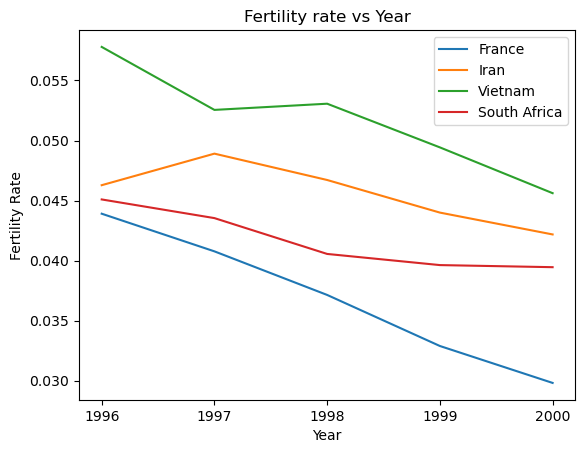

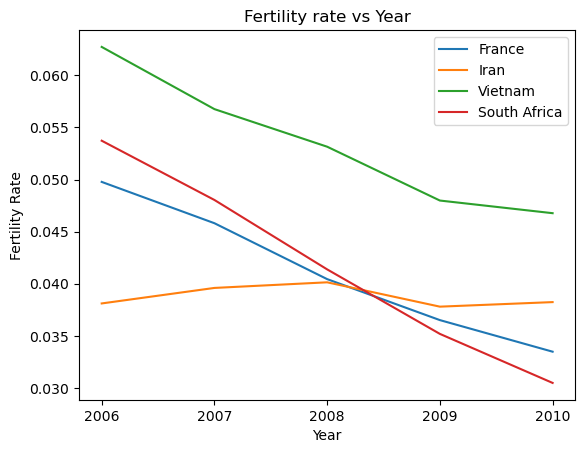

In [6]:
year_groups = df[df['COUNTRY'] != 380].groupby('YEAR')

for year, year_group in year_groups:
    plt.figure()
    plt.xlabel('Year')
    plt.ylabel('Fertility Rate')
    plt.title('Fertility rate vs Year')
    country_groups = year_group.groupby('COUNTRY')

    legend = []
    for country, country_group in country_groups:
        # print(country_group.head())
        # print(country, country_group.iloc[0][['FERTILITY_RATE_1', 'FERTILITY_RATE_2', 'FERTILITY_RATE_3', 'FERTILITY_RATE_4', 'FERTILITY_RATE_5']])
        legend.append(codes[country])
        plt.plot([x for x in range(year-5, year)], country_group.iloc[0][['FERTILITY_RATE_1', 'FERTILITY_RATE_2', 'FERTILITY_RATE_3', 'FERTILITY_RATE_4', 'FERTILITY_RATE_5']])
            
  
    plt.legend(legend)
    plt.xticks([x for x in range(year-5, year)])
  


In [4]:
independent_vars = ['PATERNITY', 'MATERNITY', 'PAID_LEAVE', 'EDATTAIN', 'AGE', 'EMPSTAT', 'COUNTRY']
dependent_vars = ['FERTILITY_RATE_1', 'FERTILITY_RATE_2', 'FERTILITY_RATE_3', 'FERTILITY_RATE_4', 'FERTILITY_RATE_5']
# Add a constant for the intercept
df['intercept'] = 1

year_groups = df[df['COUNTRY'] != 380].groupby(['YEAR'])
for year, year_group in year_groups:
    for var in dependent_vars:
        model = sm.OLS(year_group[var], year_group[independent_vars + ['intercept']])
        results = model.fit()
        print(f"Regression analysis for {var, year}:")
        print(results.summary())
        print("\n")


/tmp/ipykernel_141139/1568512918.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for year, year_group in year_groups:


Regression analysis for ('FERTILITY_RATE_1', 2001):


/home/vaibhav/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


                            OLS Regression Results                            
Dep. Variable:       FERTILITY_RATE_1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.285e+32
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        04:14:14   Log-Likelihood:             4.8122e+07
No. Observations:             1387980   AIC:                        -9.624e+07
Df Residuals:                 1387973   BIC:                        -9.624e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PATERNITY           0          0        nan        n

/home/vaibhav/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


Regression analysis for ('FERTILITY_RATE_3', 2001):


/home/vaibhav/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


                            OLS Regression Results                            
Dep. Variable:       FERTILITY_RATE_3   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.645e+31
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        04:14:15   Log-Likelihood:             4.6504e+07
No. Observations:             1387980   AIC:                        -9.301e+07
Df Residuals:                 1387973   BIC:                        -9.301e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PATERNITY           0          0        nan        n

/home/vaibhav/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


Regression analysis for ('FERTILITY_RATE_5', 2001):
                            OLS Regression Results                            
Dep. Variable:       FERTILITY_RATE_5   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.439e+31
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        04:14:17   Log-Likelihood:             4.6180e+07
No. Observations:             1387980   AIC:                        -9.236e+07
Df Residuals:                 1387973   BIC:                        -9.236e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


/home/vaibhav/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


Regression analysis for ('FERTILITY_RATE_1', 2011):
                            OLS Regression Results                            
Dep. Variable:       FERTILITY_RATE_1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.650e+31
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        04:14:23   Log-Likelihood:             2.1127e+08
No. Observations:             6411317   AIC:                        -4.225e+08
Df Residuals:                 6411310   BIC:                        -4.225e+08
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
